# Telecom Churn Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Vikash\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns',250)
df = pd.read_csv('./telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Exploratory Data Analysis

In [3]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
pd.set_option('display.max_rows',250)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [5]:
#Data Cleaning
round(100*(df.isnull().sum()/df.shape[0]),2) 

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [6]:
df.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
id_cols = ['mobile_number','circle_id']
date_cols = ['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_9',
'last_date_of_month_8',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9']

cat_cols = ['night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'night_pck_user_9',
'fb_user_6',
'fb_user_7',
'fb_user_8',
'fb_user_9']

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]
len(num_cols)

204

In [8]:
import re
def find_rech_cols(num_cols,pat):
    s = ' '.join(num_cols)
    pat = r'(\w*%s\w*)' % pat
    return re.findall(pat,s)

rech_cols = find_rech_cols(num_cols,'rech')

In [9]:
df[rech_cols].isnull().sum()*100/df.shape[0]

total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_num_9       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
count_rech_2g_6       74.846748
count_rech_2g_7       74.428744
count_rech_2g_8       73.660737
count_rech_2g_9       74.077741
count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_8       73.660737
count_rech_3g_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_

In [10]:
df.loc[(df.date_of_last_rech_6.isnull()) & (df.total_rech_data_6.isnull()),['date_of_last_rech_6','total_rech_data_6']]

,date_of_last_rech_6,total_rech_data_6
26,NaN,NaN
91,NaN,NaN
187,NaN,NaN
198,NaN,NaN
232,NaN,NaN
...,...,...
99451,NaN,NaN
99557,NaN,NaN
99680,NaN,NaN
99845,NaN,NaN


# Impute Zero for Recharge cols 

In [11]:
df[rech_cols] = df[rech_cols].fillna(0)

df[rech_cols].isnull().sum()*100/df.shape[0]

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [12]:
df[num_cols].isnull().sum()*100/df.shape[0]

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [13]:
arpu_cols = find_rech_cols(num_cols,'arpu')
#arpu_cols
df[arpu_cols] = df[arpu_cols].fillna(0)

In [14]:
df[num_cols].isnull().sum()*100/df.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [15]:
df[cat_cols].isnull().sum()*100/df.shape[0]

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [16]:
#cat cal fill with -1
df[cat_cols] = df[cat_cols].fillna(-1)

In [17]:
#date col and id col is not required, delete it
print('shape before dropping columns: ', df.shape)
df = df.drop(id_cols + date_cols, axis =1)
print('shape after droping id and date cols: ', df.shape)

shape before dropping columns:  (99999, 226)
shape after droping id and date cols:  (99999, 212)


In [18]:
df[cat_cols].isnull().sum()*100/df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [19]:
def cap_outliers(arr):
    upperbound = arr.mean() + (3*arr.std())
    lowerbound = arr.mean() - (3*arr.std())
    arr[arr > upperbound] = upperbound
    arr[arr < lowerbound] = lowerbound
    return arr

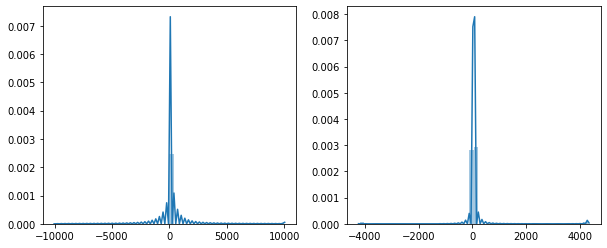

In [20]:
arr = np.arange(100)
arr[0] = -9999
arr[99] = 9999
#print('before cap: ', arr)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(arr)
arr = cap_outliers(arr)
plt.subplot(1,2,2)
sns.distplot(arr)
plt.show()
#print('after cap: ',arr)

In [21]:
df_remove_outlier = df.copy(deep=True)
df_after_outlier_remove = df_remove_outlier.apply(cap_outliers,axis = 0)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Impute rest num cols with fancyimpute IterativeImputer

In [ ]:
from fancyimpute import IterativeImputer

imputer = IterativeImputer()

df_mice = df_after_outlier_remove.copy(deep=True)
df_mice = imputer.fit_transform(MinMaxScaler().fit_transform(df_mice))
#df_mice = imputer.fit_transform(df_mice)

In [ ]:
df.isnull().sum()*100/df.shape[0]

In [ ]:
df_mice = pd.DataFrame(df_mice, columns = df_after_outlier_remove.columns)
df_mice.isnull().sum()*100/df.shape[0]

In [ ]:
df_mice.head()

In [ ]:
df_mice[rech_cols].head()

# First Objective: Filter high value customers as per revenue based

In [ ]:
df_mice['total_rech_amt_data_6'] = df_mice['total_rech_data_6'] * df_mice['av_rech_amt_data_6']
df_mice['total_rech_amt_data_7'] = df_mice['total_rech_data_7'] * df_mice['av_rech_amt_data_7']

df_mice['total_amt_data_rech_6'] = df_mice['total_rech_amt_6'] + df_mice['total_rech_amt_data_6']
df_mice['total_amt_data_rech_7'] = df_mice['total_rech_amt_7'] + df_mice['total_rech_amt_data_7']

df_mice['avg_rech_data_amt_6_7'] = (df_mice['total_amt_data_rech_6'] + df_mice['total_amt_data_rech_7'])/2

sns.boxplot(y=df_mice['avg_rech_data_amt_6_7'])
plt.show()

In [ ]:
#filter the high value customer
df_mice_filtered = df_mice.loc[df_mice.avg_rech_data_amt_6_7 >= df_mice.avg_rech_data_amt_6_7.quantile(.7),:]
print(df_mice_filtered.shape)

In [ ]:
df_mice_filtered = df_mice_filtered.reset_index(drop = True)

In [ ]:
df_mice_filtered .head()

In [ ]:
sns.boxplot(y=df_mice_filtered['avg_rech_data_amt_6_7'])
plt.show()

In [ ]:
sns.distplot(df_mice_filtered['avg_rech_data_amt_6_7'])
plt.show()

In [151]:
#drop cols
df_mice_filtered = df_mice_filtered.drop(['avg_rech_data_amt_6_7','total_rech_amt_data_6','total_rech_amt_data_7',
                                          'total_amt_data_rech_6','total_amt_data_rech_7'],axis = 1)

# Second Objective: find churn column

In [154]:
#find total incomming + outgoing calls and total 2G+3G data usage in 9th month
df_mice_filtered['total_calls_usg_9'] = df_mice_filtered['total_og_mou_9'] + df_mice_filtered['total_ic_mou_9']
df_mice_filtered['total_vol_data_usg_9'] = df_mice_filtered['vol_2g_mb_9'] + df_mice_filtered['vol_3g_mb_9']
#print(df_mice_filtered['total_calls_usg_9'].sum())
df_mice_filtered['churn'] = df_mice_filtered.apply(lambda x: 1 if (x.total_calls_usg_9 == 0 and x.total_vol_data_usg_9 == 0) else 0, axis=1)

In [155]:
df_mice_filtered.loc[((df_mice_filtered['total_og_mou_9'] <= 0) & (df_mice_filtered['total_ic_mou_9']<=0)),['total_og_mou_9','total_ic_mou_9']].head()

,total_og_mou_9,total_ic_mou_9
0,0.0,0.0
1,0.0,0.0
14,0.0,0.0
25,0.0,0.0
46,0.0,0.0


In [156]:
#drop the cols
df_mice_filtered=df_mice_filtered.drop(['total_calls_usg_9','total_vol_data_usg_9'], axis =1)

In [157]:
df_mice_filtered.churn.value_counts()*100/df_mice_filtered.shape[0]

0    91.713886
1     8.286114
Name: churn, dtype: float64

In [158]:
month_9_cols = find_rech_cols(df_mice_filtered,'9')
print(month_9_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [159]:
df_mice_filtered = df_mice_filtered.drop(month_9_cols, axis=1)
print(df_mice_filtered.shape)

(30002, 162)


In [161]:
df_mice_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,0.456561,0.468594,0.468381,0.048256,0.041060,0.000000,-0.020969,-0.012648,0.000000,0.037575,0.033209,0.000000,0.043435,0.047476,0.000000,0.055266,0.042573,0.000000,0.069996,0.058584,0.000000,0.023492,0.024223,0.000000,0.001793,-0.006908,0.000000,0.081686,0.066279,0.000000,0.021139,0.020313,0.000000,-0.058434,-0.043163,0.000000,0.005577,-0.000794,0.000000,0.0,0.0,0.0,-0.035626,-0.027276,0.000000,-0.005038,-0.002447,0.000000,-0.022109,-0.022051,0.000000,-0.014415,0.000816,0.0,0.000000,0.000000,0.000000,0.039300,0.026678,0.000349,0.028769,0.021324,0.006687,0.000855,0.001575,0.008906,0.039435,0.029597,0.005929,0.007154,0.000364,0.000000,-0.031387,-0.029206,0.000000,-0.008775,-0.006780,0.000000,0.0,0.0,0.0,-0.025409,-0.026635,0.000000,0.000000,0.000000,0.005100,0.058153,0.060682,0.0,-0.039602,-0.028793,0.000000,-0.013436,-0.011338,0.000000,0.138918,0.103764,0.069386,0.237912,0.162864,0.160124,0.540214,0.526839,0.515933,0.709407,0.725949,0.670325,0.169453,0.154919,0.151773,0.956217,0.942290,0.934263,0.0,0.000000,0.000000,0.450309,0.41227,0.397833,0.58377,0.560896,0.565562,0.043542,0.001918,0.008367,0.047642,0.085978,0.06050,0.663134,0.646838,0.653242,0.727725,0.694717,0.740679,0.62005,0.617383,0.611371,0.0,0.0,0.0,0.0,0.000000,0.000000,0.857607,0.806273,0.807898,0.0,0.0,0.0,1.0,1.0,1.0,0.201841,0.034906,0.000000,0.123139,0.035613,1
1,0.0,0.0,0.0,0.898953,1.000000,1.000000,0.056483,0.051582,0.049336,0.394805,0.482840,0.276643,0.071051,0.147213,0.148894,0.104013,0.067986,0.186467,0.102848,0.061238,0.080650,0.530580,0.793404,0.289080,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.469351,0.601342,0.290978,0.005136,0.02

# Model Building

In [1]:
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [165]:
#train_test_split

X = df_mice_filtered.drop('churn',axis =1)
y = df_mice_filtered['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 101)
print('y_train stats: \n', y_train.value_counts()*100/len(y_train))
print('y_test stats: \n', y_test.value_counts()*100/len(y_test))

y_train stats: 
 0    91.715924
1     8.284076
Name: churn, dtype: float64
y_test stats: 
 0    91.707772
1     8.292228
Name: churn, dtype: float64


In [172]:
#Create RandomForest base model
rfm = RandomForestClassifier(class_weight='balanced',n_jobs=-1, verbose = 1, oob_score = True )
help(rfm)

Help on RandomForestClassifier in module sklearn.ensemble.forest object:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.20
 |         The default value of ``n_estimators`` will change from 10 in
 |         version 0.20 to 100 in version 0.22.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria

In [173]:
rfm.fit(X_train,y_train)
y_pred = rfm.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred[:,1])
print('AUC:',auc)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=1, warm_start=False)

AUC: 0.8833666609173079


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [174]:
xgb = XGBClassifier()
help(xgb)

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecated. Use verbosity instead.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
 |  

In [175]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict_proba(X_test)
auc = roc_auc_score(y_test,y_pred[:,1])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [176]:
print('auc for xgb: ', auc)

auc for xgb:  0.9293669067841965


In [177]:

#'learning_rate': [0.001, 0.01, 0.1],
params = {'max_depth': [2,3]}
cv=3
xgb = XGBClassifier(random_state = 101,n_jobs = -1)
gs = GridSearchCV(estimator= xgb, param_grid=params, cv = cv, scoring = 'roc_auc', 
                  verbose = 1, return_train_score = True)
gs.fit(X_train,y_train)
results = pd.DataFrame(gs.cv_results_)
print(results)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scorin

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.223861      0.306749         0.093993        0.000824   
1      16.461448      0.859300         0.110996        0.012570   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.926128           0.928595   
1               3  {'max_depth': 3}           0.929343           0.932710   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.931402         0.928708        0.002154                2   
1           0.936436         0.932829        0.002897                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.945259            0.942956            0.942237   
1            0.962136            0.960534            0.959835   

   mean_train_score  std_train_score  
0          0.943484         0.001289  
1          0.960835         0.000963  


In [178]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,12.223861,0.306749,0.093993,0.000824,2,{'max_depth': 2},0.926128,0.928595,0.931402,0.928708,0.002154,2,0.945259,0.942956,0.942237,0.943484,0.001289
1,16.461448,0.859300,0.110996,0.012570,3,{'max_depth': 3},0.929343,0.932710,0.936436,0.932829,0.002897,1,0.962136,0.960534,0.959835,0.960835,0.000963


In [188]:
#'learning_rate': [0.001, 0.01, 0.1],
params = {'learning_rate': [0.1,0.2,0.3]}
cv=3
xgb = XGBClassifier(random_state = 101,n_jobs = -1, max_depth = 3)
gs = GridSearchCV(estimator= xgb, param_grid=params, cv = cv, scoring = 'roc_auc', 
                  verbose = 1, return_train_score = True)
gs.fit(X_train,y_train)
results = pd.DataFrame(gs.cv_results_)
#print(results)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [191]:
print('Best Params: ', gs.best_params_)
print('Best Score: ', gs.best_score_)

Best Params:  {'learning_rate': 0.2}
Best Score:  0.9332039387991088


In [192]:
results = pd.DataFrame(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.402351,0.162820,0.098337,0.002622,0.1,{'learning_rate': 0.1},0.929343,0.932710,0.936436,0.932829,0.002897,2,0.962136,0.960534,0.959835,0.960835,0.000963
1,15.443537,0.071540,0.110653,0.026509,0.2,{'learning_rate': 0.2},0.930122,0.935602,0.933888,0.933204,0.002289,1,0.979140,0.977859,0.976639,0.977879,0.001021
2,15.432592,0.065863,0.096338,0.004802,0.3,{'learning_rate': 0.3},0.925610,0.931764,0.929499,0.928958,0.002541,3,0.987139,0.986045,0.986111,0.986432,0.000501


In [194]:
#n_estimators
params = {'n_estimators': [100,200,300]}
cv=3
xgb = XGBClassifier(random_state = 101,n_jobs = -1, max_depth = 3,learning_rate=0.2)
gs = GridSearchCV(estimator= xgb, param_grid=params, cv = cv, scoring = 'roc_auc', 
                  verbose = 1, return_train_score = True)
gs.fit(X_train,y_train)
results = pd.DataFrame(gs.cv_results_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [195]:
print('Best Params: ', gs.best_params_)
print('Best Score: ', gs.best_score_)

Best Params:  {'n_estimators': 100}
Best Score:  0.9332039387991088


# Final Model

In [196]:
xgb = XGBClassifier(random_state = 101,n_jobs = -1, max_depth = 3,learning_rate=0.2, n_estimators = 100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred[:,1])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [197]:
print('AUC: ', auc)

AUC:  0.9320474868991745


In [218]:
important_features = dict(zip(X_train.columns, xgb.feature_importances_))
#important_feature = pd.DataFrame(important_features,columns = ['Attribute','Importance'])
#important_feature.head()
important_features = {k:v for k,v in sorted(important_features.items(),key = lambda item: item[1], reverse = True)}

<Figure size 1440x2880 with 0 Axes>

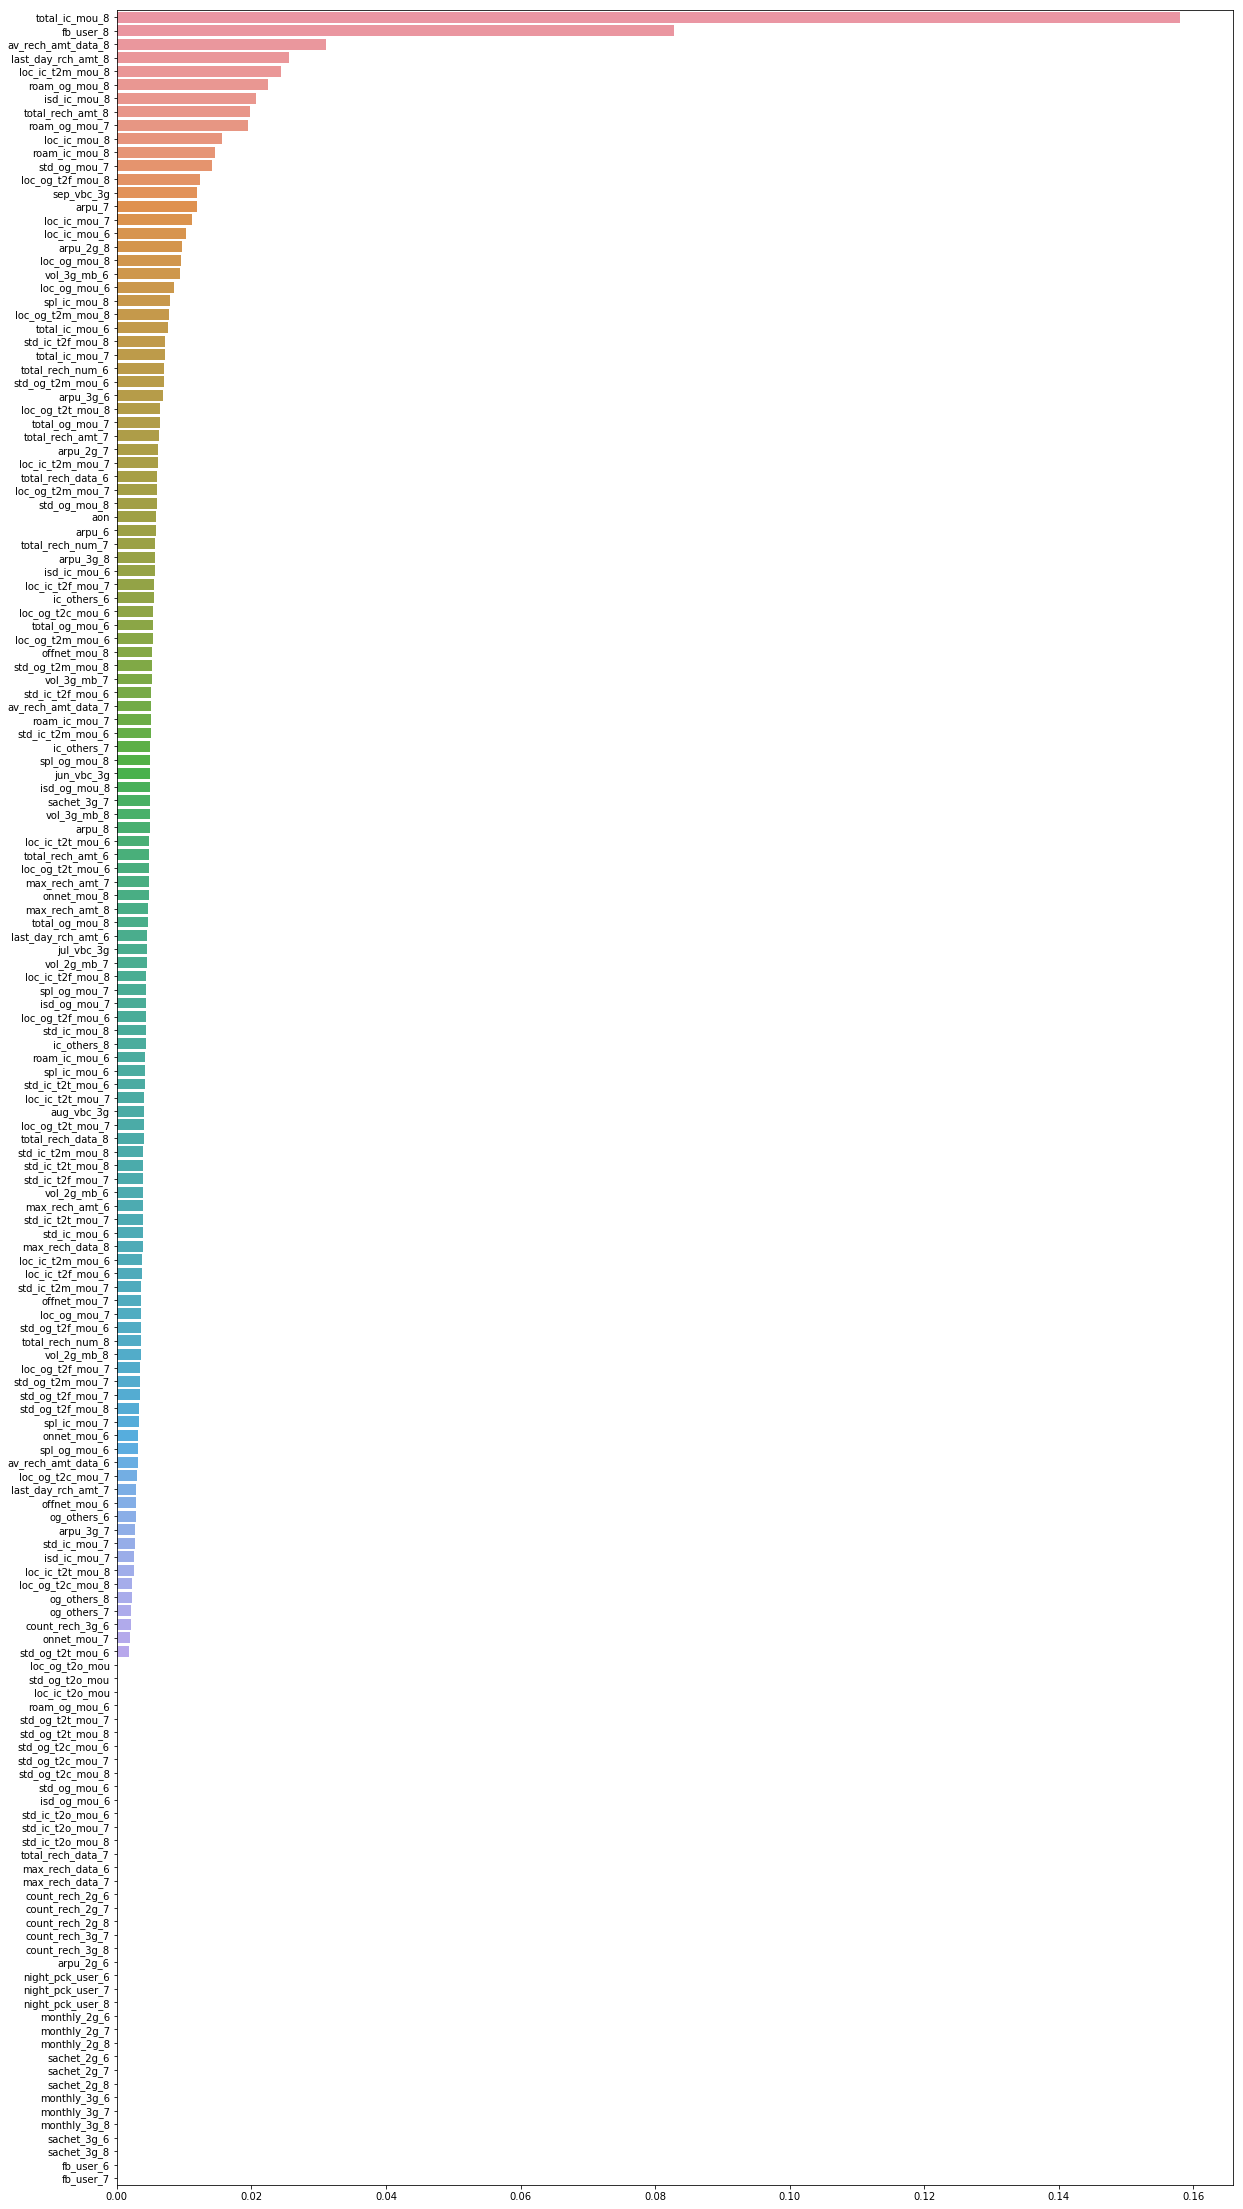

In [219]:
plt.figure(figsize=(20,40))
sns.barplot(y = list(important_features.keys()), x = list(important_features.values()))
plt.show()

In [220]:
len(X_train.columns)

161

In [221]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
25532,0.0,0.0,0.0,0.569954,0.618756,0.529051,0.185964,0.159879,0.067923,0.539038,0.596365,0.459652,0.0,0.0,0.0,0.0,0.0,0.0,0.291853,0.213278,0.087578,0.548305,0.221432,0.119459,0.173549,0.000000,0.000000,0.000000,0.000000,0.000000,0.525696,0.263734,0.126054,0.053257,0.068841,0.032100,0.341929,0.640420,0.524178,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.251594,0.453520,0.356748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.477477,0.497045,0.352882,0.136783,0.085357,0.067461,0.456155,0.226409,0.226284,0.024602,0.002120,0.005421,0.377894,0.193348,0.186843,0.000000,0.000000,0.001770,0.026910,0.088756,0.077103,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020153,0.066551,0.058619,0.333443,0.208462,0.184782,0.0,0.0,0.0,0.000000,0.051619,0.021813,0.0,0.311537,0.0,0.347294,0.380470,0.312238,0.320721,0.326374,0.245270,0.274394,0.229969,0.294819,0.309662,0.126753,0.053200,0.847264,0.309838,0.151773,0.087274,0.086003,0.085270,0.993094,0.363463,0.181991,0.000000,0.00000,0.000000,0.266403,0.102386,0.051619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084110,0.070709,0.067599,0.105139,0.047240,0.154299,0.62005,0.617383,0.611371,0.0,0.0,0.0,1.0,0.373949,0.187236,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.5,0.5,0.128584,0.000000,0.000000,0.000000,0.0
7562,0.0,0.0,0.0,1.000000,0.766329,1.000000,0.028203,0.053328,0.106390,0.355519,0.236125,0.245092,0.0,0.0,0.0,0.0,0.0,0.0,0.022195,0.087017,0.084154,0.226721,0.062656,0.200155,0.310277,0.352237,0.166471,0.000000,0.000000,0.000000,0.174984,0.108508,0.183876,0.021236,0.013647,0.080399,0.247742,0.213562,0.151893,0.323315,1.000000,0.462363,0.0,0.0,0.0,0.177497,0.164823,0.15

In [222]:
X_test.to_csv('./test.csv',index = False)

In [223]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))